/var/folders/7g/05cm4jj579vf7_ghn0gwcsc00000gn/T/ipykernel_5041/2050374813.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(gym.corr())


                      number_people  timestamp  day_of_week  is_weekend  \
number_people              1.000000   0.550218    -0.162062   -0.173958   
timestamp                  0.550218   1.000000    -0.001793   -0.000509   
day_of_week               -0.162062  -0.001793     1.000000    0.791338   
is_weekend                -0.173958  -0.000509     0.791338    1.000000   
is_holiday                -0.048249   0.002851    -0.075862   -0.031899   
temperature                0.373327   0.184849     0.011169    0.020673   
is_start_of_semester       0.182683   0.009551    -0.011782   -0.016646   
is_during_semester         0.335350   0.044676    -0.004824   -0.036127   
month                     -0.097854  -0.023221     0.015559    0.008462   
hour                       0.552049   0.999077    -0.001914   -0.000517   

                      is_holiday  temperature  is_start_of_semester  \
number_people          -0.048249     0.373327              0.182683   
timestamp               0.002851

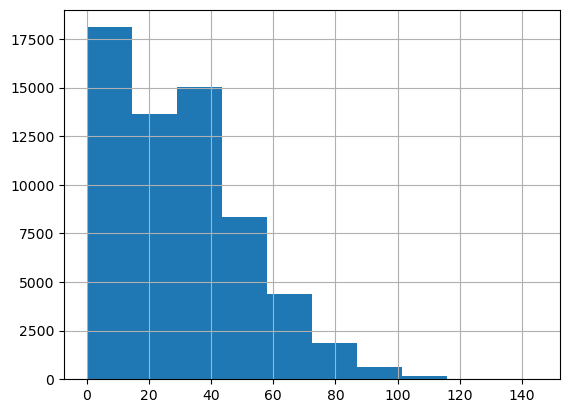

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

gym = pd.read_csv('./Downloads/crowdness_gym_data.csv')
# print(gym.describe())
# gym.info()
print(gym.corr())
# gym['number_people'].plot()
# plt.show()
gym['number_people'].hist()
plt.show()

# from scipy.stats import boxcox 

# number_of_people_plus_constant = gym['number_people'] + 1
# print(number_of_people_plus_constant)
# modified_series, lmbda = boxcox(number_of_people_plus_constant)
# gym['number_people_boxcox'] = modified_series
# gym.info()
# gym['number_people_boxcox'].hist() # This is more normally distributed, but there's also a big left column.
# plt.show()
# print(gym.corr()) # the boxcox transformation doesn't make things much more linear. I guess hour and temperature are a little stronger. is_during_semester is a little lower

Hour, temperature and is_during_semester seem like the best features to use for a model. I'm going to try using every feature.

In [43]:
# print(gym['is_during_semester'].value_counts())

1    41055
0    21129
Name: is_during_semester, dtype: int64


In [62]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# X = gym[['hour', 'temperature', 'is_during_semester']]
try:
    gym = gym.drop('date', axis=1)
except:
    print('already dropped')
X = gym.iloc[:, 1:]
# print(X)
y = gym['number_people']
# print(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.15)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

sgdr = SGDRegressor(random_state = 52)
sgdr.fit(X_scaled, y_train)

already dropped


SGDRegressor(random_state=52)

Evaluating Model performance

In [69]:
y_pred = sgdr.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(mse)
mae = mean_absolute_error(y_test, y_pred)
print(mae)
r2 = r2_score(y_test, y_pred)
print(r2)

250.68801162958093
12.164437336958333
0.5101300145449449


Visualize the results

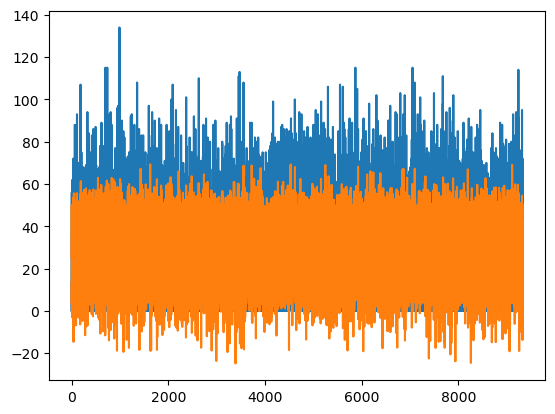

In [73]:
plt.plot(range(0,len(y_test)),y_test)
plt.plot(range(0,len(y_test)),y_pred)

It looks like the predictions are constantly too low. The model also seems to only explain about half of the variability in the data. Maybe the relationship between the variabiles isn't linear or different forms of data should be collected.